In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from statsmodels.stats.outliers_influence import OLSInfluence

from pandas.plotting import scatter_matrix

%matplotlib inline
plt.style.use('ggplot')

In [5]:
df = pd.read_csv('Auto.csv', na_values='?')
df = df.dropna()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


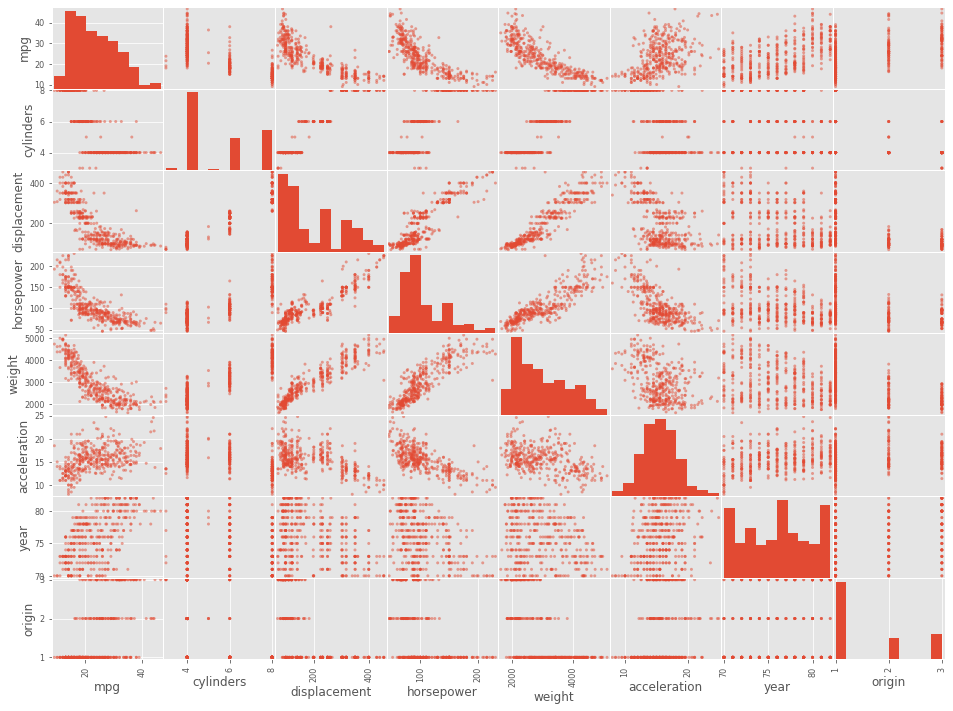

In [11]:
scatter_matrix(df,alpha=0.5, figsize=(16,12));

# Correlation Matrix

In [12]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<AxesSubplot:>

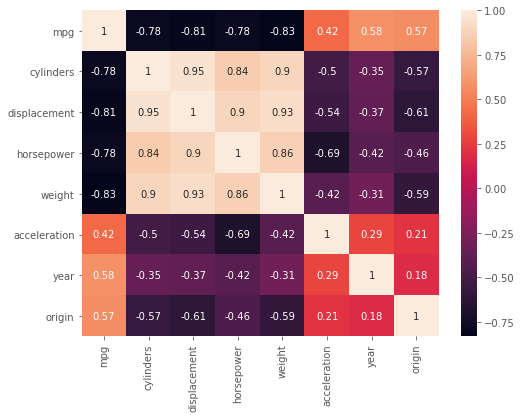

In [19]:
# heatmap the matrix
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(df.corr(), annot=True)

In [25]:
X = sm.add_constant(df.iloc[:,1:-1])
y = df.mpg

model = sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Tue, 30 Nov 2021   Prob (F-statistic):          2.04e-139
Time:                        22:13:28   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

There is a strong relationship between the response and the predictors: displacement, weight, year and origin. This is because their p-values are low.

There is strong correlation between displacement, horsepower and weight, indicating there is a collinearity problem.

# Peformance Diagnosis

Text(0, 0.5, 'leverage')

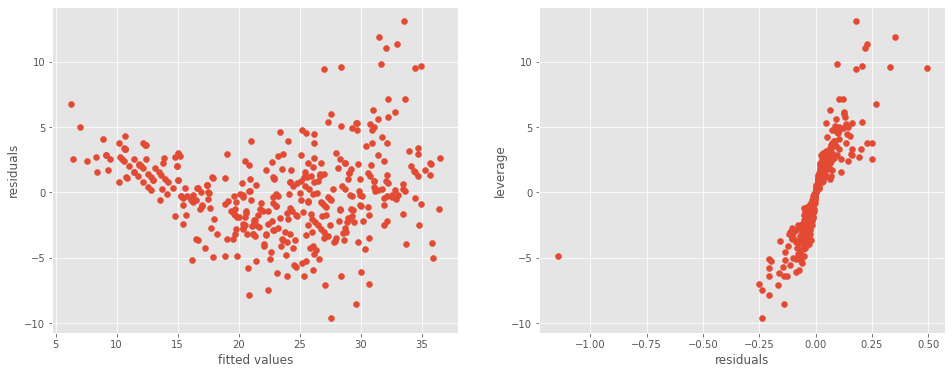

In [42]:
# Obtaining the residuals

fitted_values = model.fittedvalues
residuals = model.resid.values
leverage = OLSInfluence(model).influence 

# ploting these values on a figure

fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,6))

# Residuals
ax1.scatter(fitted_values, residuals)
ax1.set_xlabel('fitted values')
ax1.set_ylabel('residuals')

# Leverate
ax2.scatter(leverage, residuals)
ax2.set_xlabel('residuals')
ax2.set_ylabel('leverage')

The plot of the residuals indicatees non-linearity in the data. The U-shape means the fit is worse at the extreme values of the fit. The leverage plot shows there are several high leverage points.


# Fit a Model with Interaction Effects

In [44]:
df['weight*year'] = df.weight * df.year
X_interaction = sm.add_constant(df[['weight','year','weight*year']])
y= df.mpg

# constructing model estimate and summarize
int_model = sm.OLS(y, X_interaction)
int_result = int_model.fit()
print(int_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     649.3
Date:                Tue, 30 Nov 2021   Prob (F-statistic):          8.06e-151
Time:                        23:17:49   Log-Likelihood:                -1009.3
No. Observations:                 392   AIC:                             2027.
Df Residuals:                     388   BIC:                             2043.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -110.4519     12.947     -8.531      

The weight*year interaction is significant. With a unit increase in weight*year the mpg drops slightly but significantly

# Transform Variables

In [45]:
# Add a weight**2 variable along with the interaction between weight and year
df['weight**2'] = df.weight**2
X_quadratic = sm.add_constant(df[['weight','weight**2','year', 'weight*year']])
y = df.mpg

quad_model = sm.OLS(y,X_quadratic)
quad_results = quad_model.fit()
print(quad_results.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     577.4
Date:                Tue, 30 Nov 2021   Prob (F-statistic):          1.21e-161
Time:                        23:22:14   Log-Likelihood:                -980.70
No. Observations:                 392   AIC:                             1971.
Df Residuals:                     387   BIC:                             1991.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const         -53.4414     14.093     -3.792      

The weight^2 term is significant, but weight term is no longer significant

NameError: name 'leverages' is not defined

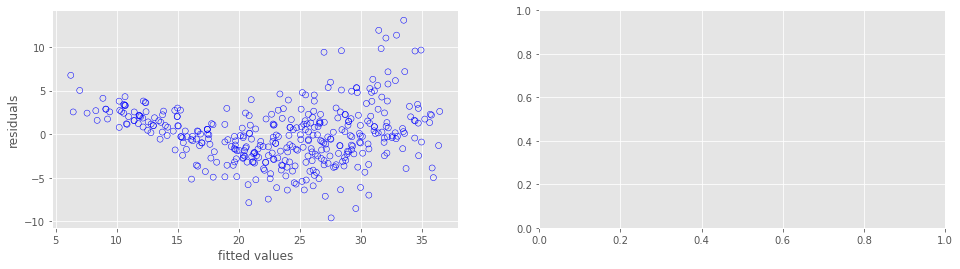

In [47]:
quad_fitted_values = quad_results.fittedvalues
quad_residuals = quad_results.resid.values
quad_leverage = OLSInfluence(quad_results).influence

# Plot
fig, (ax1,ax3) = plt.subplots(1,2,figsize=(16,4))

# Residuals
ax1.scatter(quad_fitted_values, quad_residuals, facecolors='none', edgecolors='b');
ax1.set_xlabel('fitted values');
ax1.set_ylabel('residuals');


# Leverages
ax2.scatter(leverages, quad_residuals, facecolors='none', edgecolors='b');
ax2.set_xlabel('Leverage');
ax2.set_ylabel('studentized residual');